In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
### degree表示要为原来的数据集最多添加几次幂的特征
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [5]:
X2.shape

(100, 3)

In [6]:
'''
第一列为x的0次方的特征
第二列为x的1次方的特征
第三列为x的2次方的特征
'''
X2[:5, :]

array([[ 1.        , -2.11292896,  4.46446878],
       [ 1.        , -1.38245471,  1.91118102],
       [ 1.        , -1.94682802,  3.79013933],
       [ 1.        ,  1.90731061,  3.63783375],
       [ 1.        ,  0.27067394,  0.07326438]])

In [7]:
X[:5, :]

array([[-2.11292896],
       [-1.38245471],
       [-1.94682802],
       [ 1.90731061],
       [ 0.27067394]])

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

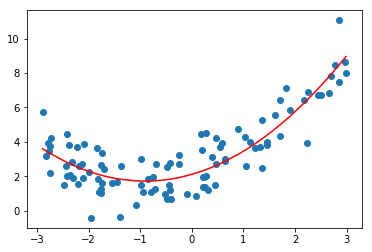

In [9]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')

In [10]:
lin_reg2.coef_

array([0.        , 0.86606078, 0.47706496])

In [11]:
lin_reg2.intercept_

2.1080760912325833

### 关于PolynomialFeatures

In [12]:
X = np.arange(1, 11).reshape(-1, 2)

In [13]:
X.shape

(5, 2)

In [14]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [15]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [16]:
X2.shape

(5, 6)

In [17]:
'''
如果原来数据集有两个特征的话
会产生3个新的列
第一列为0次幂
第二，三列对应原来矩阵的列
第四列为原来矩阵第一列的平方
第五列为原来矩阵两列相乘的结果
最后一列为原来矩阵第二列的平方
'''
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [18]:
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X3 = poly.transform(X)

X3.shape

(5, 10)

In [19]:
X3

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

### PipeLine

In [20]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
'''
1. 多项式的特征
2. 数据的归一化
3. 线性回归
PipeLine将三步合在一起
'''
poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

In [22]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

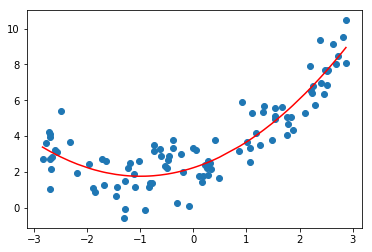

In [23]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')